# 9  Spatial and Image Data Using GeoPandas

Reading in Raster Data

In [25]:
import urllib

url = 'https://arcticdata.io/metacat/d1/mn/v2/object/urn%3Auuid%3A6b847ab0-9a3d-4534-bf28-3a96c5fa8d72'

msg = urllib.request.urlretrieve(url, "Coastal_2020_08.tif")

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.3999999521443642e+38, 'width': 3087, 'height': 2308, 'count': 1, 'crs': CRS.from_epsg(3338), 'transform': Affine(999.7994153462766, 0.0, -2550153.29233849,
       0.0, -999.9687691991521, 2711703.104608573), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}


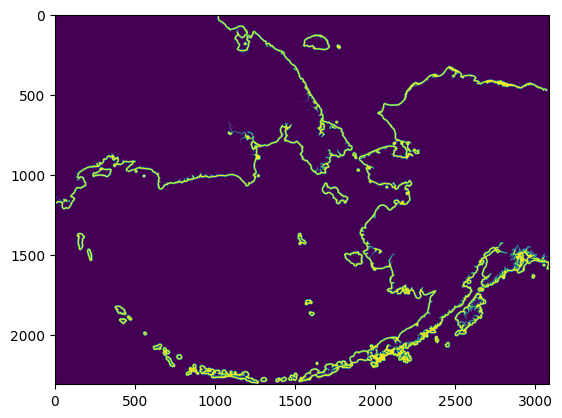

In [26]:
import rasterio
import matplotlib.pyplot as plt

with rasterio.open("Coastal_2020_08.tif") as ship_con:
    ships = ship_con.read(1)
    ships_meta = ship_con.profile

plt.imshow(ships)
print(ships_meta)

In [27]:
type(ships)

numpy.ndarray

In [28]:
type(ships_meta)

rasterio.profiles.Profile

Reading in Vector Data

In [29]:
url = 'https://knb.ecoinformatics.org/knb/d1/mn/v2/object/urn%3Auuid%3A7c942c45-1539-4d47-b429-205499f0f3e4'

msg = urllib.request.urlretrieve(url, "Alaska_Commercial_Salmon_Boundaries.gpkg")

In [30]:
#geopandas is like pandas for spatial data, it's great
import geopandas as gpd

comm = gpd.read_file("Alaska_Commercial_Salmon_Boundaries.gpkg")

In [31]:
#looking at the column names of the comm geodatafram
comm.columns.values

array(['OBJECTID', 'GEOMETRY_START_DATE', 'GEOMETRY_END_DATE',
       'STAT_AREA', 'STAT_AREA_NAME', 'FISHERY_GROUP_CODE',
       'GIS_SERIES_NAME', 'GIS_SERIES_CODE', 'REGION_CODE',
       'REGISTRATION_AREA_NAME', 'REGISTRATION_AREA_CODE',
       'REGISTRATION_AREA_ID', 'REGISTRATION_LOCATION_ABBR',
       'MANAGEMENT_AREA_NAME', 'MANAGEMENT_AREA_CODE', 'DISTRICT_NAME',
       'DISTRICT_CODE', 'DISTRICT_ID', 'SUBDISTRICT_NAME',
       'SUBDISTRICT_CODE', 'SUBDISTRICT_ID', 'SECTION_NAME',
       'SECTION_CODE', 'SECTION_ID', 'SUBSECTION_NAME', 'SUBSECTION_CODE',
       'SUBSECTION_ID', 'COAR_AREA_CODE', 'CREATOR', 'CREATE_DATE',
       'EDITOR', 'EDIT_DATE', 'COMMENTS', 'STAT_AREA_VERSION_ID',
       'Shape_Length', 'Shape_Area', 'geometry'], dtype=object)

In [32]:
comm.head()

,OBJECTID,GEOMETRY_START_DATE,GEOMETRY_END_DATE,STAT_AREA,STAT_AREA_NAME,FISHERY_GROUP_CODE,GIS_SERIES_NAME,GIS_SERIES_CODE,REGION_CODE,REGISTRATION_AREA_NAME,...,COAR_AREA_CODE,CREATOR,CREATE_DATE,EDITOR,EDIT_DATE,COMMENTS,STAT_AREA_VERSION_ID,Shape_Length,Shape_Area,geometry
0,12,1975-01-01 00:00:00+00:00,NaT,33461,Tanana River mouth to Kantishna River,B,Salmon,B,3,Yukon Area,...,YU,Evelyn Russel,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-02-02 00:00:00+00:00,"Yukon District, 6 Subdistrict and 6-A Section ...",NaN,4.610183,0.381977,"MULTIPOLYGON (((-151.32805 64.96913, -151.3150..."
1,13,1975-01-01 00:00:00+00:00,NaT,33462,Kantishna River to Wood River,B,Salmon,B,3,Yukon Area,...,YU,Evelyn Russel,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-02-02 00:00:00+00:00,"Yukon District, 6 Subdistrict and 6-B Section ...",NaN,3.682421,0.321943,"MULTIPOLYGON (((-149.96255 64.70518, -149.9666..."
2,18,1978-01-01 00:00:00+00:00,NaT,33431,Toklik to Cottonwood Point,B,Salmon,B,3,Yukon Area,...,YL,Evelyn Russel,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-02-02 00:00:00+00:00,Yukon District and 3 Subdistrict until 1/1/1980,NaN,2.215641,0.198740,"MULTIPOLYGON (((-161.39853 61.55463, -161.4171..."
3,19,1980-01-01 00:00:00+00:00,NaT,33442,"Right Bank, Bishop Rock to Illinois Creek",B,Salmon,B,3,Yukon Area,...,YU,Evelyn Russel,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-02-02 00:00:00+00:00,NaN,NaN,9.179852,0.382788,"MULTIPOLYGON (((-153.15234 65.24944, -153.0761..."
4,20,1980-01-01 00:00:00+00:00,NaT,33443,"Left Bank, Cone Point to Illinois Creek",B,Salmon,B,3,Yukon Area,...,YU,Evelyn Russel,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-02-02 00:00:00+00:00,NaN,NaN,9.500826,0.378262,"MULTIPOLYGON (((-152.99905 65.17027, -152.9897..."


In [33]:
#looking at coordinate reference system
comm.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

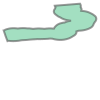

In [34]:
#plotting one polygon just by calling it
comm['geometry'][8]

<AxesSubplot:>

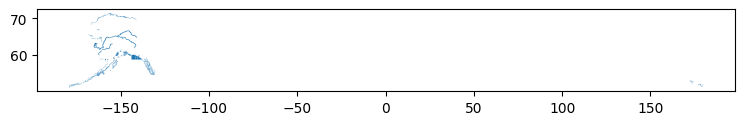

In [35]:
#looking  at everything
comm.plot(figsize=(9,9))

Transforming the CRS for the comm geodataframe from a global CRS to a local Alaskan CRS


<AxesSubplot:>

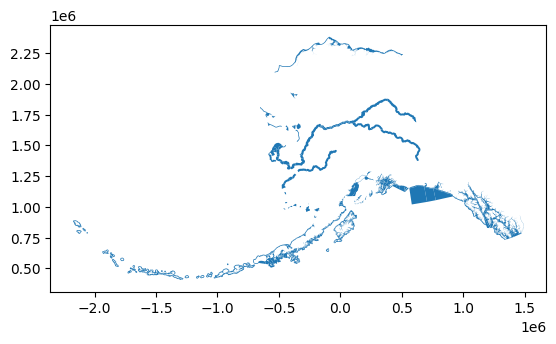

In [36]:
comm_3338 = comm.to_crs("EPSG:3338")

comm_3338.plot()

In [46]:
from shapely.geometry import box #used to make a bounding box for the geodata

#making a bounding box with latlon coords
coord_box = box(-159.5, 55, -144.5, 62)

#changing the bounding box to a geodataframe and changing it's CRS to 3338 (the local Alaskan CRS) all to match the data
coord_box_df = gpd.GeoDataFrame(crs = "EPSG:4326", geometry = [coord_box]).to_crs("EPSG:3338")

In [47]:
import rasterio.mask
import numpy as np

with rasterio.open("Coastal_2020_08.tif") as ship_con:
    shipc_arr, shipc_transform = rasterio.mask.mask(ship_con,
                                                    coord_box_df["geometry"],
                                                    crop=True)
    shipc_meta = ship_con.meta
    # select just the 2-D array (by default a 3-D array is returned even though we only have one band)
    shipc_arr = shipc_arr[0,:,:]
    # turn the no-data values into NaNs.
    shipc_arr[shipc_arr == ship_con.nodata] = np.nan

In [48]:
#changing the meta data, you have to redefine everything even if you aren't changing it, 
#we are switching the transform to the one we made above to use the masking
shipc_meta.update({"driver": "GTiff",
                 "height": shipc_arr.shape[0],
                 "width": shipc_arr.shape[1],
                 "transform": shipc_transform,
                 "compress": "lzw"})

In [49]:
#using the bounding box to crop the data
comm_clip = gpd.sjoin(comm_3338, #what are we joining to (the comm geodata df)
                        coord_box_df, #second object we are joining (this is the bounding box df)
                        how = 'inner', #keeping only the intersection of both the comm geodata and the bounding box
                        predicate = 'within')

Plotting the Raster Data and Vector Data Together

<AxesSubplot:>

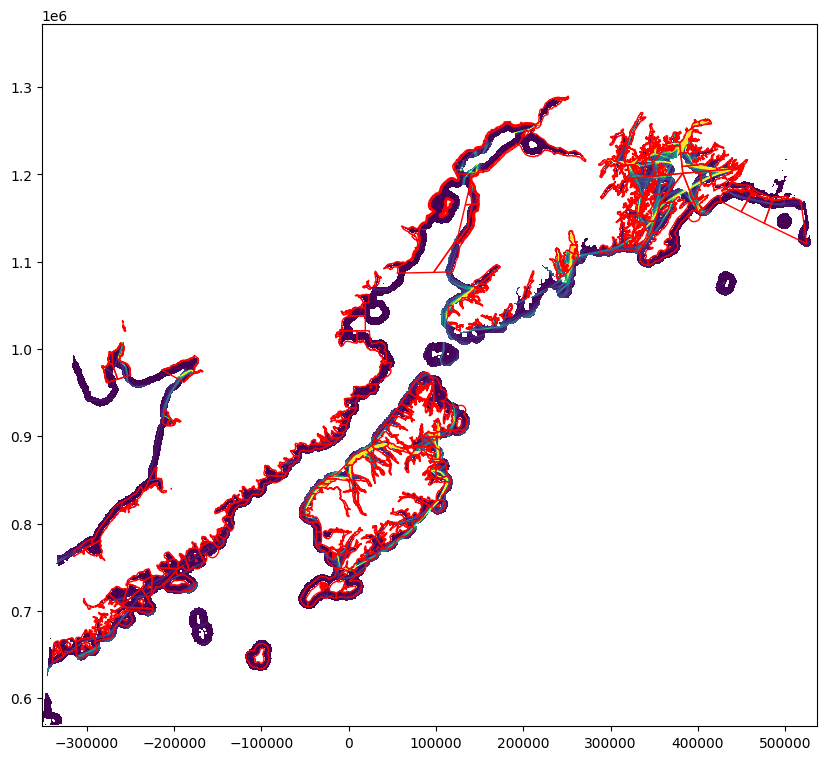

In [77]:
import rasterio.plot

# set up plot
fig, ax = plt.subplots(figsize=(10, 10))
# plot the raster
rasterio.plot.show(shipc_arr,
                   ax=ax,
                   vmin = 0,
                   vmax = 50000,
                   transform = shipc_transform)
# plot the vector
comm_clip.plot(ax=ax, facecolor='none', edgecolor='red')

Rasterizing the vector data

In [52]:
#example of rasterizing the data for one row of the vector data
from rasterio import features

r40 = features.rasterize(comm_clip['geometry'][40].geoms, #getting the geometry value for the 40th row
                                    out_shape=shipc_arr.shape, #
                                    transform=shipc_meta['transform'], #getting the transform we specified in the shipc meta data
                                    all_touched=True) #slight overestimate, include all cells that overlap with cells, even slightly

<AxesSubplot:>

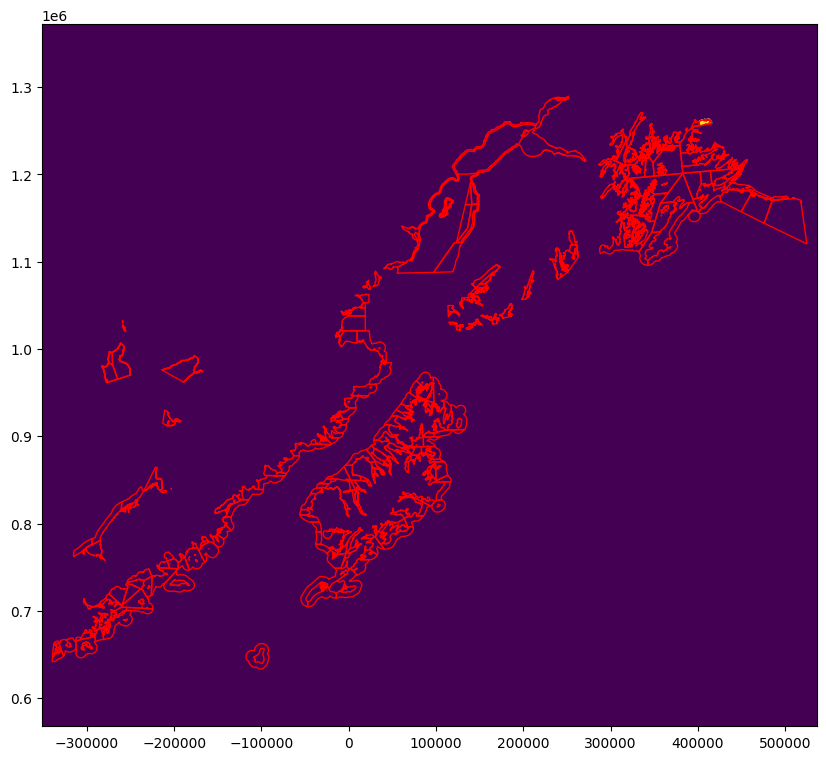

In [74]:
# set up plot
fig, ax = plt.subplots(figsize=(10, 10))
# plot the raster
rasterio.plot.show(r40,
                   ax=ax,
                   vmin = 0,
                   vmax = 1,
                   transform = shipc_meta['transform'])
# plot the vector
comm_clip.plot(ax=ax, facecolor='none', edgecolor='red')

In [54]:
np.unique(r40)

array([0, 1], dtype=uint8)

In [57]:
#getting all the indices where the raster data == 1
r40_index = np.where(r40 == 1)

In [58]:
#summing all the distances traveled in this raster
np.nansum(shipc_arr[r40_index])

14369028.0

Summary Stats for all Polygons

In [59]:
#adding id column to comm_clip
comm_clip['id'] = range(0,len(comm_clip))

In [61]:
comm_clip.head()

,OBJECTID,GEOMETRY_START_DATE,GEOMETRY_END_DATE,STAT_AREA,STAT_AREA_NAME,FISHERY_GROUP_CODE,GIS_SERIES_NAME,GIS_SERIES_CODE,REGION_CODE,REGISTRATION_AREA_NAME,...,CREATE_DATE,EDITOR,EDIT_DATE,COMMENTS,STAT_AREA_VERSION_ID,Shape_Length,Shape_Area,geometry,index_right,id
39,94,2012-01-01 00:00:00+00:00,NaT,22330,,B,Salmon,B,2,Prince William Sound Area,...,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-03-31 00:00:00+00:00,NaN,NaN,2.188227,0.030013,"MULTIPOLYGON (((318413.684 1230482.468, 318575...",0,0
40,95,2004-01-01 00:00:00+00:00,NaT,22168,Solomon Gulch THA,B,Salmon,B,2,Prince William Sound Area,...,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-03-31 00:00:00+00:00,NaN,NaN,0.881387,0.010914,"MULTIPOLYGON (((401885.622 1255960.584, 401365...",0,1
41,96,2004-01-01 00:00:00+00:00,NaT,22160,,B,Salmon,B,2,Prince William Sound Area,...,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-03-31 00:00:00+00:00,NaN,NaN,0.676153,0.007094,"MULTIPOLYGON (((396590.668 1262277.816, 396645...",0,2
42,97,1961-01-01 00:00:00+00:00,NaT,22150,,B,Salmon,B,2,Prince William Sound Area,...,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-03-31 00:00:00+00:00,NaN,NaN,3.556800,0.048109,"MULTIPOLYGON (((388721.609 1225081.809, 380273...",0,3
43,98,2012-01-01 00:00:00+00:00,NaT,22312,,B,Salmon,B,2,Prince William Sound Area,...,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-03-31 00:00:00+00:00,NaN,NaN,0.858479,0.023543,"MULTIPOLYGON (((315804.131 1210691.072, 315456...",0,4


In [63]:
distance_dict = {}

for geom, idx in zip(comm_clip['geometry'], comm_clip['id']):
    rasterized = features.rasterize(geom.geoms,
                                    out_shape = shipc_arr.shape,
                                    transform = shipc_meta['transform'],
                                    all_touched = True) #overestimate, all cells touched by polygons
    r_index = np.where(rasterized == 1) #getting an index of where the cells were overlapped with the polygons
    distance_dict[idx] = np.nansum(shipc_arr[r_index]) #summing the distances traveled for each cell

In [64]:
import pandas as pd

# create a data frame from the distance dict we got as a result up above
distance_df = pd.DataFrame.from_dict(distance_dict,
                                     orient='index',
                                     columns=['distance'])

# extract the index of the data frame as a column to use in a join and convert distance to kilometers
distance_df['id'] = distance_df.index
distance_df['distance'] = distance_df['distance']/1000

In [65]:
# join the sums to the original data frame
res_full = comm_clip.merge(distance_df,
                           on = "id", #rows must have the same id to match up
                           how = 'inner') #only keeping intersection of rows

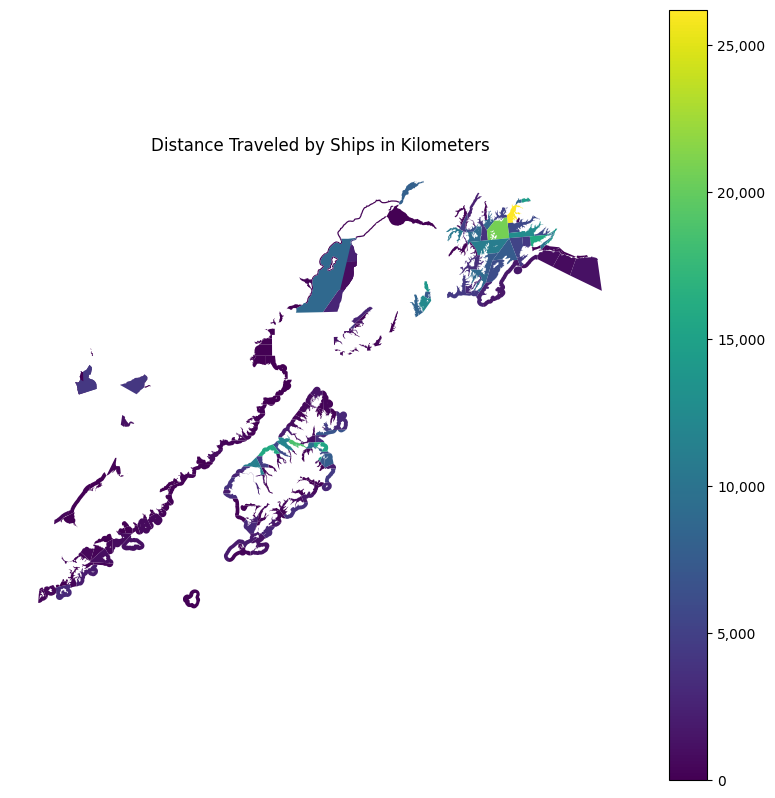

In [72]:
import matplotlib.ticker
fig, ax = plt.subplots(figsize=(10, 10))

ax = res_full.plot(column = "distance", legend = True, ax = ax)
fig = ax.figure
label_format = '{:,.0f}'
cb_ax = fig.axes[1]
ticks_loc = cb_ax.get_yticks().tolist()
cb_ax.yaxis.set_major_locator(matplotlib.ticker.FixedLocator(ticks_loc))
cb_ax.set_yticklabels([label_format.format(x) for x in ticks_loc])
ax.set_axis_off()
ax.set_title("Distance Traveled by Ships in Kilometers")
plt.show()

In [78]:
#using dissolve to switch from smaller regions to larger regions, smaller raster cells to larger cells
reg_area = res_full.dissolve(by = "REGISTRATION_AREA_NAME", #agregating by this column 
                             aggfunc = 'sum') #using sum, like we did earlier

/home/sainsbury/.virtualenvs/scomp/lib/python3.9/site-packages/geopandas/geodataframe.py:1686: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggregated_data = data.groupby(**groupby_kwargs).agg(aggfunc)


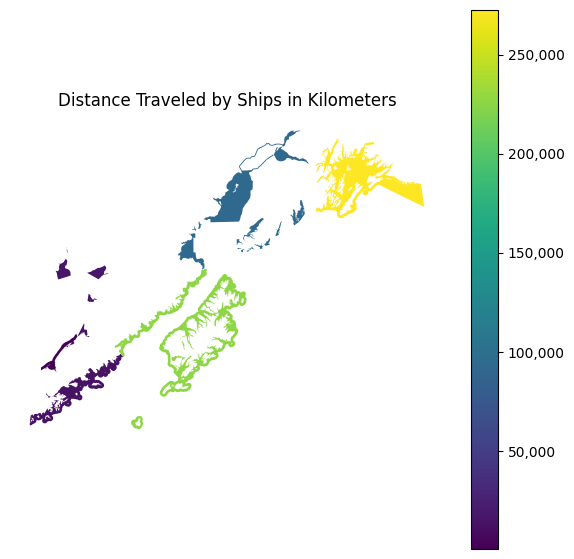

In [79]:
fig, ax = plt.subplots(figsize=(7, 7))

ax = reg_area.plot(column = "distance", legend = True, ax = ax)
fig = ax.figure
label_format = '{:,.0f}'
cb_ax = fig.axes[1]
ticks_loc = cb_ax.get_yticks().tolist()
cb_ax.yaxis.set_major_locator(matplotlib.ticker.FixedLocator(ticks_loc))
cb_ax.set_yticklabels([label_format.format(x) for x in ticks_loc])
ax.set_axis_off()
ax.set_title("Distance Traveled by Ships in Kilometers")
plt.show()